## Adagrad Motivation

* Sparse Features, constant learning rate across features and learning rates scheduler like $\eta = \frac{\eta_0}{\sqrt{t + c}} $

* Sparse features : presence of infrequent features (language model)

* Constant Learning Rate : We need to adjust learning rates depending on the feature 

* In this case, learning rate either dec too slowly for freq features or too quickly for infrequent ones.

* Quick fix : $\eta = \frac{\eta_0}{\sqrt{s(t) + c}} $ where s(t) is count of non-zeros in a feature

* Works only incase of sparsity
 

## AdaGrad

* Adjust Learning Rate : Replace the s(t) by aggregate of squares of prev gradients

$$ s(i, t+1)  = s(i, t) + [\nabla_i f(x)]^2 $$

* Benefits:
    * No longer need to decide when grads are longer
    * It scales auto to magnitude of grads

* Features that corresponds to high grads will be scaled down & others will small grads will recieve gentle treatment

## AdaGrad Algorithm

* We apply this feature wise. Learning or Updating per coordinate/feature

$$ s_t  = s_{t-1} + [\nabla_t f(x)]^2 $$
$$ w_t = w_{t-1} - \frac{\eta}{\sqrt{s_t + \epsilon}}\nabla_t $$

* $\epsilon$ is added to avoid the term getting divided by 0, $s_0 = 0$.

## Implementation
 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [9]:
f = lambda x1, x2 : 0.1*x1**2 + 2*x2**2
gradf = lambda x1, x2 : (0.2*x1, 4*x2)

def ada_grad_calc(x1, x2, s1, s2, eta):
    eps = 1e-06
    (g1, g2) = gradf(x1, x2)
    s1 += g1**2
    s2 += g2**2
    x1 -= eta/np.sqrt(s1 + eps)* g1
    x2 -= eta/np.sqrt(s2 + eps)* g2
    return x1, x2, s1, s2

def ada_grad_desc(init_val, eta):
    x1, x2 = init_val
    s1, s2 = 0, 0
    results = [(x1, x2)]
    for i in range(200):
        x1, x2, s1, s2 = ada_grad_calc(x1, x2, s1, s2, eta)
        results.append((x1, x2))
    return results

In [20]:
res_low_lr = ada_grad_desc(init_val = [-15, -12], eta = 0.4)
res_high_lr = ada_grad_desc(init_val = [-15, -12], eta = 10)

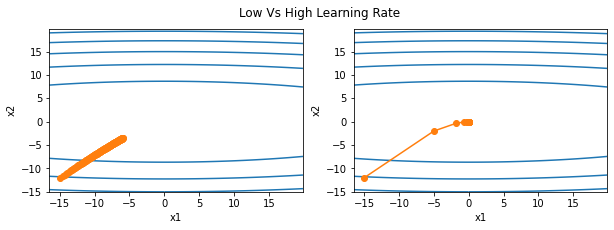

In [21]:
def plot_gd_update(results):
    plt.figure(figsize=(10, 3))
    plt.suptitle("Low Vs High Learning Rate")
    subplots = [121, 122]
    for result, subplot in zip(results, subplots):
        plt.subplot(subplot)
        x1, x2 = tf.meshgrid(tf.range(-16.5, 20.0, 0.1),
                          tf.range(-15.0, 20.0, 0.1))
        plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
        plt.plot(*zip(*result), '-o', color='#ff7f0e')
        plt.xlabel('x1')
        plt.ylabel('x2')

plot_gd_update([res_low_lr, res_high_lr])

## Observations

* Adagrad works with adaptive gradients for each coordinate (features)

* Algrothmically there is just scaling of learning rates across features. It is based on their previous gradients

* The decrease in learning rate for a feature can be aggresive as seen in LHS thus it hasnt converged yet. So we had to increase the learning rate to counter increase in denominator of learning rate equation. 

* This has lead to better convergence in RHS with increased LR